<a href="https://colab.research.google.com/github/nahor8011/Customer-Churn-Prediction/blob/main/1.2.1%20Bivariate_Con_Con.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [6]:
datal = 'https://drive.google.com/uc?export=download&id=1OsX1C1awZKqstYnuSKiKB0ynnYFWHSNI'
data = pd.read_csv(datal)
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [9]:
# Isolating Numerical Data Types

numerical = data.select_dtypes(include=['int64','float64','Int64'])
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

**Correlation Matrix**

In [10]:
numerical.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.007750,1.000000,0.006220,0.005192,0.007616,-0.001154,0.003512,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004769
age,-0.000442,0.006220,1.000000,-0.000612,0.015439,-0.076532,-0.058990,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.005192,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.007616,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.001154,-0.076532,0.013134,0.006613,1.000000,0.235059,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,0.003512,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
current_balance,0.006589,0.000031,0.054346,-0.003070,-0.005654,-0.058314,0.000181,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,-0.004089,-0.059854,0.000214,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,-0.006298,-0.059535,0.001955,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960


In [15]:
c = numerical.corr().abs()

s = c.unstack()
so = s.sort_values(kind = 'quicksort',ascending=False)
so = pd.DataFrame(so, columns=['Pearson Correlation'])

In [16]:
so[so['Pearson Correlation'] < 1].head(20)

,,Pearson Correlation
average_monthly_balance_prevQ,previous_month_balance,0.994038
previous_month_balance,average_monthly_balance_prevQ,0.994038
current_month_balance,current_balance,0.983412
current_balance,current_month_balance,0.983412
current_month_balance,average_monthly_balance_prevQ,0.976290
average_monthly_balance_prevQ,current_month_balance,0.976290
current_month_balance,previous_month_end_balance,0.974714
previous_month_end_balance,current_month_balance,0.974714
average_monthly_balance_prevQ,previous_month_end_balance,0.970530
previous_month_end_balance,average_monthly_balance_prevQ,0.970530


**HeatMap**

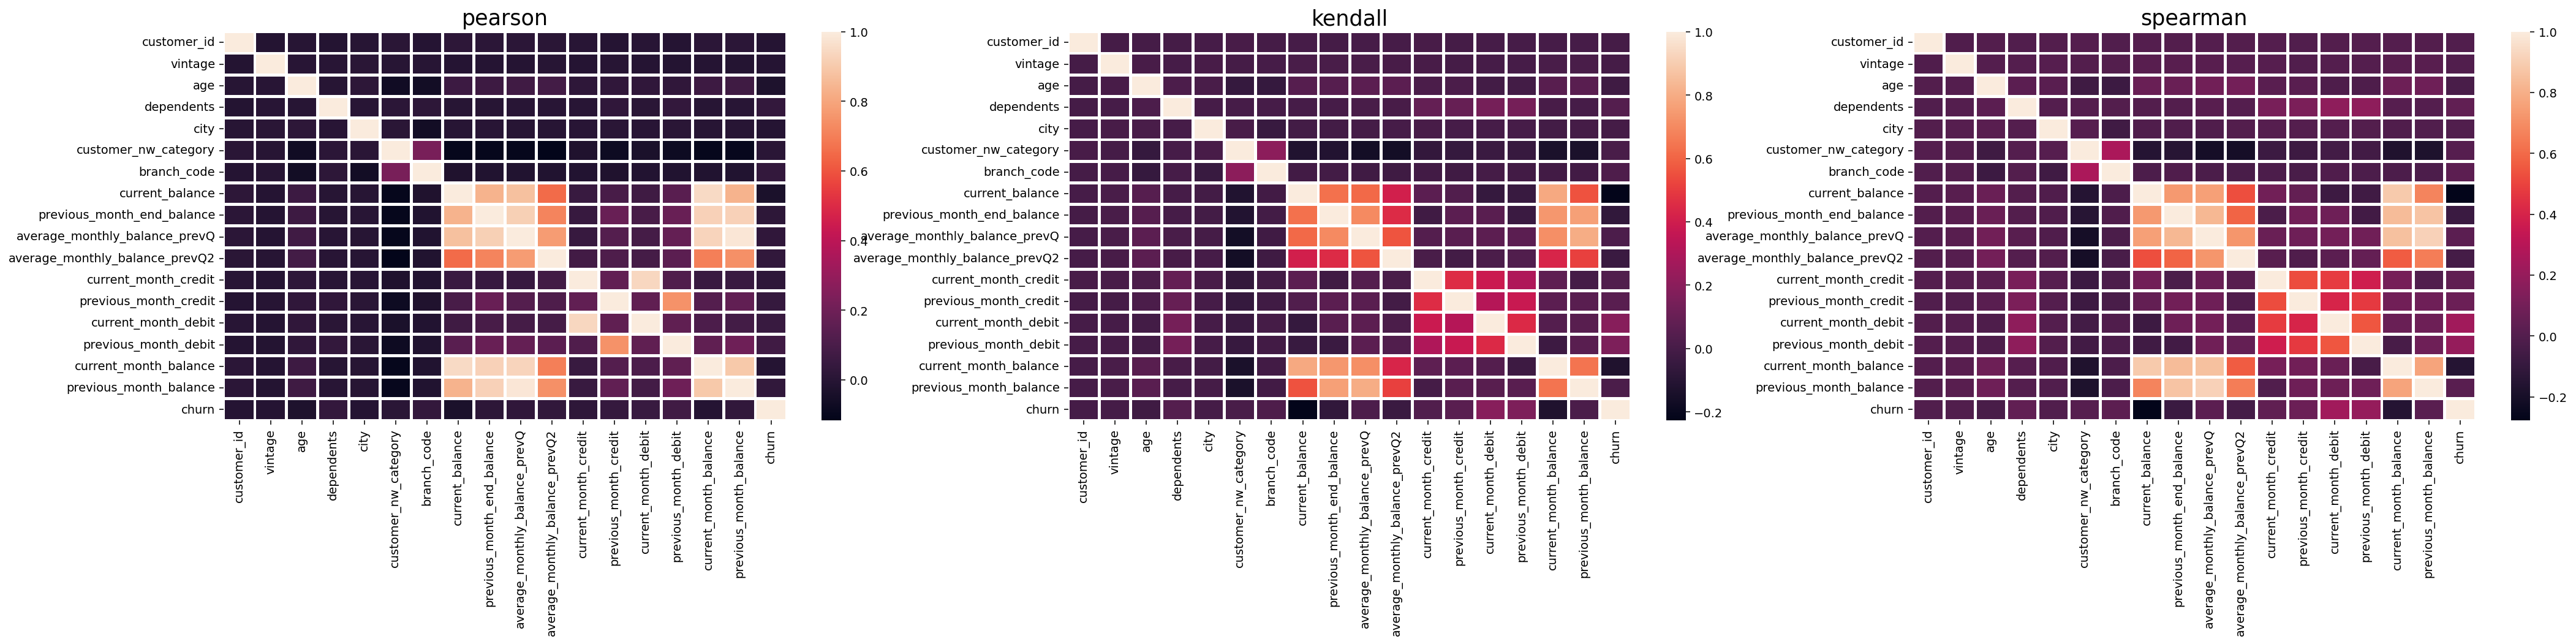

In [20]:
plt.figure(figsize=(36,6), dpi = 140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)